# **AGNES**

AGNES (Agglomerative Nesting) is one of the most popular hierarchical clustering algorithms  used in data mining.

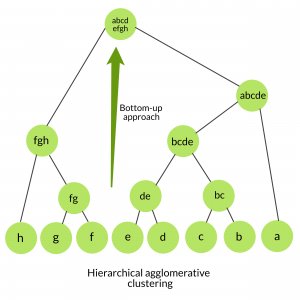

Hierarchical clustering in data mining is a cluster formation and analysis technique that builds groups of similar objects by forming a hierarchy of clusters. That hierarchy forms a tree-like structure which is known as a [dendrogram](https://en.wikipedia.org/wiki/Dendrogram).

For more understanding of this algorithm, please go through [this post](https://analyticsindiamag.com/perform-agglomerative-hierarchical-clustering-using-agnes-algorithm/) once.

## **Practical implementation of AGNES**

Here’s a demonstration of implementing the AGNES algorithm on a custom-created dataset. Step-wise explanation of the code is as follows:

### **1. Import required Modules/Packages**

Import required Python modules ([math](https://docs.python.org/3/library/math.html) for computations to create clusters and pylab for clusters’ visualization)

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels scikit-image --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
import math
import pylab as pl 

### **2. Create Dataset**

Initialize a collection of numerical points, which will be used to form coordinates of data points to be clustered.

In [ ]:
data_points = """
 1,0.527,0.63,2,0.753,0.434,4,0.672,0.724,4,0.573,0.373,2,0.846,0.283,
 6,0.763,0.172,7,0.941,0.782,8,0.542,0.541,3,0.666,0.078,10,0.121,0.372,
 12,0.256,0.927,10,0.891,0.039,10,0.682,0.122,15,0.671,0.878,12,0.67,0.51,
 16,0.91,0.892,13,0.777,0.893,17,0.139,0.748,16,0.373,0.781,22,0.672,0.289,
 20,0.778,0.892,21,0.743,0.367,22,0.453,0.367,23,0.488,0.567,24,0.573,0.319, 24,0.341,0.449,25,0.545,0.372,26,0.474,0.936,27,0.445,0.725,32,0.436,0.468""" 

### **3. Extract the data**

Split the above-defined comma-separated collection to extract coordinates of data points.

In [ ]:
x = data_points.split(',') 


Form the data points by pairing successive points as x and y coordinates.

In [ ]:
dataset = [(float(x[i]), float(x[i+1])) for i in range(1, len(x)-1, 3)]

### **4. Define a function to compute distance between two data points.**

In [ ]:
def distance(x, y):
     return math.sqrt(math.pow(x[0]-y[0], 2)+math.pow(x[1]-y[1], 2)) 

The function will calculate distance using the distance between points (a1,b1) and (a2,b2) using the distance formula as follows:    

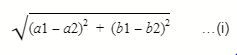

The following 3 steps define functions for different ways of computing distance/similarity between two clusters. We can find distance between closest points of two clusters; less the distance, more is the similarity between the clusters. The function min_distance() for such calculation has been defined in next step below. It takes one-one point from two clusters and computes distance between them using above eq(i). The process is repeated for each point in the first cluster taken with each of the points of the other cluster. The minimum of the computed distances is then returned. 

The same procedure, except min() replaced with max(), is followed if we want to compute the distance between two clusters based on the distance between their farthest points. The function max_distance() defined in step (6) performs such calculation. 

Instead of considering one-one points from both clusters to compute the similarity between two clusters, step (7) defines a function avg_distance() which takes all points of both the clusters into consideration. 

### **5. Define min_distance() function.**

In [ ]:
def min_distance(Ci, Cj):
    return min(distance(i, j) for i in Ci for j in Cj) 

Minimum distance between clusters Ci and Cj is calculated as:

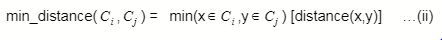

### **6. Define max_distance function**

In [ ]:
def max_distance(Ci, Cj):
    return max(distance(i, j) for i in Ci for j in Cj) 

Maximum distance between clusters Ci and Cj is given as:

image.png

### **7. Define avg_distance() function.**

In [ ]:
def avg_distance(Ci, Cj):
    return sum(distance(i, j) for i in Ci for j in Cj)/(len(Ci)*len(Cj)) 

Average distance between clusters Ci and Cj is given by the formula:

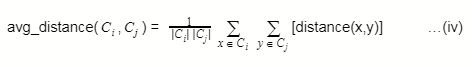

### **8. Define a function to calculate minimum distance between two clusters.**

In [ ]:
def minimum(A):
    min = 1000
    a = 0; b = 0 
    for x in range(len(A)):
            for y in range(len(A[x])):
              if x != y and A[x][y] < min:
                  min = A[x][y];a = x; b = y
    return (a, b, min) 

### **9. Define a function to form the actual clusters.**

In [ ]:
def AGNES(ds, distance, k):
    """
    The parameters will be a tuple as (dataset, min/max/avg distance between clusters, number of clusters to be formed i.e. k)

    Initialize empty arrays to store clusters (array C) and distances between clusters (array M) (this distance between clusters will be computed depending on which of the 
    three methods from those defined in steps (5),(6) and (7) you use).
    """
    C = [];M = []
    for i in ds: #For each point in the dataset
        Ci = []
        Ci.append(i)#Add point i to ith cluster division
        C.append(Ci) #Append Ci to the array of clusters C
    for i in C:#For each point in C
        Mi = [] #Initialize an array for ith point
        for j in C: #For every point j in C (including itself)
        #Append the distances calculated for each point i to array M
    #Compute distance between i and j points. Min_distance, max_distance or avg_distance whichever distance calculation method’s name 
    #will be provided as an argument to AGNES(), accordingly that method will be used when distance(i,j) will be called in the following step.
            Mi.append(distance(i, j))
        #Append distances of i from all points j to array Mi
        M.append(Mi)
    #A variable ‘q’ will record the number of clusters formed at any point of time. 
    #It is initialized as the length of the dataset because initially there will be singleton-clusters i.e. each point assigned to a different cluster. As we merge the clusters, the value of q will be decremented.

    q = len(ds)#Initialized to length of dataset 
    #Merge clusters till value of q exceeds the number of required clusters ‘k’
    
    while q > k:
 
    #Call the minimum() function defined in step (8) to know the clusters with minimum distance

        x, y, min = minimum(M)

        #Add the cluster C[y] to the cluster group of C[x] (merging of clusters)
        C[x].extend(C[y])
        #
        #Remove the cluster C[y] from the array C. The reason behind this removal is -  suppose, we grouped clusters 1 and 2. 
        #We remove cluster 2 from array C. So now distance between cluster 1 and clusters other than 2 should be computed for further merging. 
        #Since cluster 2 has already been merged with 1, it’s distance from 1 need not be computed so cluster 2 is removed from array C.
        C.remove(C[y])
        #Initialize array M, compute its distance from other clusters and store it in M. 
        #If while loop’s condition holds true, again the process of finding minimum distant clusters will be repeated based on the distance values stored in array M.
        M = []
        for i in C:
            Mi = []
            for j in C:
                Mi.append(distance(i, j))
            M.append(Mi)
        #Decrement number of clusters formed i.e. ‘q’ which will again be compared with ‘k’ to know if further merging of clusters is required.
        q -= 1
    #Return the final group of clusters C=[C1, C2,...,Ck]

    return C

### **10. Define a function to plot the final clusters.**

In [ ]:
def plot(C):
  """
  Initialize an array to define colors for marking the data points.
  Color values as per matplotlib.colors are: ‘r’ for red, ‘y’ for yellow, ‘g’ for green, ‘b’ for blue, ‘c’ for cyan, ‘k’ for black and ‘m’ for magenta.
  """
  color_Value = ['r', 'y', 'g', 'b', 'c', 'k', 'm']
#For each cluster in the clusters’ division
  for i in range(len(C)):
#Initialize arrays for x and y coordinates of a datapoint
      coordinate_X = []    
      coordinate_Y = []    
#Add x and y coordinates to relevant arrays
      for j in range(len(C[i])):
          coordinate_X.append(C[i][j][0])
          coordinate_Y.append(C[i][j][1])
  #Scatter plot of the data points
      pl.scatter(coordinate_X, coordinate_Y, marker='x', 
    color=color_Value[i%len(color_Value)], label=i)
    
    ##Suppose, i=0 i.e. 1st cluster from the cluster division C.
    #Then, i%len(color_Value) will be equal to 0%7=0 so 1st color from the color_Values array i.e. ‘r’ (red) will be assigned to the first cluster in the visualization plot.
    #"""
#Define the location of displaying legend of the plit
  pl.legend(loc='upper right')
#Display the plot
  pl.show() 

### **11. Apply AGNES Algorithm**

Now, try applying the AGNES algorithm to the dataset with different clusters and methods to calculate the distance between clusters.

In [ ]:
#With max_distance() used for distance computation and 4 clusters to be formed
C = AGNES(dataset, max_distance, 4)
#Visualize the clusters
plot(C) 

In [ ]:
#With min_distance() and 5 clusters to be formed
C = AGNES(dataset, min_distance, 5)
#Visualize the clusters
plot(C) 

In [ ]:
#With avg_distance() and 6 clusters to be formed
C = AGNES(dataset, avg_distance, 6)
#Visualize the clusters
plot(C) 

# **Related Articles:**



> * [Perform AGNES Algorithm for Clustering](https://analyticsindiamag.com/perform-agglomerative-hierarchical-clustering-using-agnes-algorithm/)

> * [Comparison Of K-Means & Hierarchical Clustering In Customer Segmentation](https://analyticsindiamag.com/comparison-of-k-means-hierarchical-clustering-in-customer-segmentation/)

> * [Most Popular Clustering Algorithms](https://analyticsindiamag.com/most-popular-clustering-algorithms-used-in-machine-learning/)

> * [Comprehensive Guide to CLARANS](https://analyticsindiamag.com/comprehensive-guide-to-clarans-clustering-algorithm/)

> * [Comprehensive Guide to K-Medoids](https://analyticsindiamag.com/comprehensive-guide-to-k-medoids-clustering-algorithm/)

> * [Clustering Algorithm every Data Science Practitioner should know](https://analyticsindiamag.com/clustering-techniques-every-data-science-beginner-should-swear-by/)

> * [Beginner Guide to K-Means](https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/)

> * [Is K-Means is the best algorithm?](https://analyticsindiamag.com/is-k-means-clustering-really-the-best-unsupervised-learning-algorithm/)